In [9]:
%load_ext autoreload
%autoreload 2

import sys 
import os 

home = os.path.join('..','..')

pths = [os.path.join(home, 'pincam')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)
        
from pincam.utils import *
from pincam.pincam import PinCam 
from pincam.matrix_utils2 import MatrixUtils2 as mu
#import pincam.feature as af 

from ladybug_geometry.geometry2d.line import LineSegment2D

import matplotlib.pyplot as plt

r = lambda d: d / 180. * np.pi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


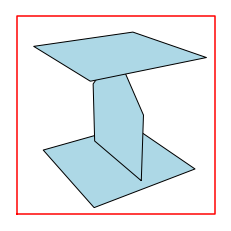

In [49]:
# Define surfaces
bot_srf = np.array(
    [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]]
    )
top_srf = np.array(
    [[-5, -5, 10], [5, -5, 10], [5, 5, 10], [-5, 5, 10]]
    )
vrt_srf = np.array(
    [[-4, 0, 0], [4, 0, 0], [4, 0, 6], [0, 0, 10], [-4, 0, 6]]
    )
ptmtx = [vrt_srf, top_srf, bot_srf]

# Plot
focal_length = 35
heading = r(15)
pitch = r(25)
cam_point = np.array([0, -35, 4])
pincam = PinCam(cam_point, heading, pitch, focal_length)

df = gpd.GeoDataFrame({})
df['geometry'] = pincam.to_gpd_geometry(ptmtx)
pincam.heading = 45
df['geometry'] = pincam.to_gpd_geometry(ptmtx)

# Plot
f, a = plt.subplots(figsize=(4, 4))
df.plot(edgecolor='black', alpha=1, ax=a, facecolor='lightblue')
b = pincam.sensor_bounds(100)
a.plot(b[:,0], b[:,1], 'red')
a.grid(False)
_ = a.axis(False)